# The Data incubator 

### Application for the fellowship program


## Statemnt of the problem:

Each new term in the Fibonacci sequence is generated by adding the previous two terms. By starting with $1$ and $2$, the first $12$ terms will be:
$$0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89 \dots$$

By considering the terms in the Fibonacci sequence whose values do not exceed four million, find the sum of the even-valued terms.


## Solution

The Fibonnaci sequence can be written using the following recursive expression:

$$ F_n = F_{n-1} + F_{n-2} \quad \text{with } F_{0}=0 \text{ and } F_{1}=1.$$


In [49]:
import time
import numpy as np
from itertools import filterfalse
import matplotlib.pyplot as plt


def fib_sequence(fib_fun, num_max, fib_even=False):
    
    '''
    This function creates a list with a Fibonnaci sequence with upper bound num_max
    
    :fib_fun: function that calculates the nth term in the Fibonacci sequence
    :num_max: integer: upper bound for the Fibonacci sequence
    :fib_even: Boolean: If true, returns anly the even Fibonacci sequence
    :return: list: [F_0, F_1, F_2, ..., F_n] such that F_n < num_max 
    '''   
    
    fib_nums = []
    n_start = 0
    fib_n = 0
    
    while fib_n < num_max:
        fib_n = fib_fun(n_start)
        
        if(fib_even):
            if (fib_n % 2) == 0:
                fib_nums.append(fib_n)
        else:
            fib_nums.append(fib_n)
        
        n_start = n_start + 1
        fib_n = fib_fun(n_start)
        
    return fib_nums


### 1. Recursive algorithm to generate Fibinacci sequence

In [8]:
def fibonacci_recursive(n):
    '''
    This function calculates the nth Fibonnaci term using recursion
    
    :n: integer    
    :return: integer . F(n) = F(n-1) + F(n-2)  
    '''   
    if n in [0, 1]:  
        return n
    
    return fibonacci_recursive(n - 1) + fibonacci_recursive(n - 2)  
    

In [15]:
n_max = 4000000

start = time.time()
fib_list = fib_sequence(fibonacci_recursive, n_max, fib_even=True)
end = time.time()

print("", f"Sum of even numbers in the Fibonacci sequence that do not exceed 4000000 is: {sum(fib_list)}",
      "", f"The total time spent in the computation was: {end - start}", "",sep='\n')



Sum of even numbers in the Fibonacci sequence that do not exceed 4000000 is: 4613732

The total time spent in the computation was: 9.618291854858398



### 2. Memoization technique using classes

In [12]:
class Fib_class:
    '''
    Class that computes the nth term of the Fibonacci sequence using memoization
    '''
    
    # Init method: Initial values of the Fibonnaci sequence
    def __init__(self):
        self.memo = [0, 1]
    
    # Call method: calculates F_n using recursion. The previous values in the sequence are stored in the chache memory
    def __call__(self, n):

        if n < len(self.memo):
            return self.memo[n]
        else:
            fib_number = self(n - 1) + self(n - 2)
            self.memo.append(fib_number)

        return self.memo[n]



In [16]:
n_max = 4000000

fib_class = Fib_class()

start = time.time()
fib_list = fib_sequence(fib_class, 4000000, fib_even=True)
end = time.time()

print("", f"Sum of even numbers in the Fibonacci sequence that do not exceed 4000000 is: {sum(fib_list)}",
      "", f"The total time spent in the computation was: {end - start}"," " , sep='\n')



Sum of even numbers in the Fibonacci sequence that do not exceed 4000000 is: 4613732

The total time spent in the computation was: 0.0001327991485595703
 


### 3. Generate a Fibonacci sequence of even numbers based on a mathematical argument

#### Observation

In [17]:
[(x,fib_class(x)) for x in range(34)]

[(0, 0),
 (1, 1),
 (2, 1),
 (3, 2),
 (4, 3),
 (5, 5),
 (6, 8),
 (7, 13),
 (8, 21),
 (9, 34),
 (10, 55),
 (11, 89),
 (12, 144),
 (13, 233),
 (14, 377),
 (15, 610),
 (16, 987),
 (17, 1597),
 (18, 2584),
 (19, 4181),
 (20, 6765),
 (21, 10946),
 (22, 17711),
 (23, 28657),
 (24, 46368),
 (25, 75025),
 (26, 121393),
 (27, 196418),
 (28, 317811),
 (29, 514229),
 (30, 832040),
 (31, 1346269),
 (32, 2178309),
 (33, 3524578)]

Is every third number in the Fibonacci sequence ($F_0, F_{3}, F_{6}, \dots, F_{3n}$) an even number?

#### Lemma

Every third number in a Fibonnacci squence is even.

#### Proof

Let us use mathematical induction:

1. By definition $F_0=0$, thus, $F_{0}$ is an even number.

2. Let us assume the $F_{3(n-1)}$ is even. This implies that the two previous numbers in the sequence, $F_{3n-4}$ and $F_{3n-5}$, must be ood numbers.

3. Using the definition of the Fibonacci sequence, we have the following


\begin{align}
    F_{3n} &= F_{3n-1} + F_{3n-2}, \\
           &= F_{3n-2} + F_{3n-3} + F_{3n-3} + F_{3n-4}, \\
           &= F_{3n-3} + F_{3n-4} + 2F_{3n-3} + F_{3n-4}, \\
           &= 3F_{3(n-1)} + 2F_{3n-4},
\end{align}

   by using the assumption of item (2.), we have that $F_{3(n-1)}$ is an even number and $F_{3n-4}$ is an odd number. Thus, we can write $F_{3(n-1)} = 2c$ and $F_{3(n-1)} = 2d + 1$ where $c,d \in \mathbb{N}$ and then obtain the following expression
   
\begin{align}
    F_{3n} &= 3(2c) + 2(2d +1),\\
           &= 2a + 2b +2, \quad \text{where } a=2c \text{ and } b=2d,\\
           &= 2(a+b+1), \\
           &= 2k, \quad \text{where } k=a+b+1.
\end{align}   
   
  We can, therefore, conclude that $F_{3n}$ is even.

#### Deriving a Fibonnaci sequence for even numbers

Let us expand further the expression obtained in the equation above

\begin{align}
    F_{3n} &= 3F_{3(n-1)} + 2F_{3n-4}, \\
           &= 3F_{3n-3} + F_{3n-4} + F_{3n-5} + F_{3n-6}, \\
           &= 4F_{3n-3} + F_{3n-6}
\end{align}

let $m$ define the index of the mth even number in the Fibonacci sequence $(F_0, F_{3}, F_{6}, \dots, F_{3n-3}, F_{3n})$ = $(F_0, F_{3}, F_{6}, \dots, F_{m-1}, F_{m})$. We can, therefore, write an expression for the even version of the Fibonacci sequence as

\begin{align}
    F_{m} &= 4F_{m-1} + F_{m-2}, \quad F_{0}=0 \text{ and } F_{1}=2.
\end{align}

In [18]:
class even_Fib_class:
    '''
    Class that computes the mth term of the even Fibonacci sequence using memoization
    '''
    
    # Init method: Initial values of the Fibonnaci sequence
    def __init__(self):
        self.memo = [0, 2]
    
    # Call method: calculates F_n using recursion. The previous values in the sequence are stored in the chache memory
    def __call__(self, m):
        
        if m < len(self.memo):
            return self.memo[m]
        else:
            fib_number = 4*self(m - 1) + self(m - 2)
            self.memo.append(fib_number)

        return self.memo[m]

In [48]:
n_max = 4000000

even_fib_class = even_Fib_class()

start = time.time()
fib_list = fib_sequence(even_fib_class, 4000000)
end = time.time()

print(f"Sum of even numbers in the Fibonacci sequence that do not exceed 4000000 is: {sum(fib_list)}",
      f"The total time spent in the computation was: {end - start}", "" , sep='\n')


Sum of even numbers in the Fibonacci sequence that do not exceed 4000000 is: 4613732
The total time spent in the computation was: 8.392333984375e-05



In [46]:
even_fib_class = even_Fib_class()

start = time.time()
fib_value = even_fib_class(11)
fib_list = even_fib_class.memo
end = time.time()

print(f"Sum of even numbers in the Fibonacci sequence that do not exceed 4000000 is: {sum(fib_list)}",
      f"The total time spent in the computation was: {end - start}", "" , sep='\n')

Sum of even numbers in the Fibonacci sequence that do not exceed 4000000 is: 4613732
The total time spent in the computation was: 0.00021386146545410156



### Timing

In [22]:
def fib_sequence_timing(fib_fun, num_max, fib_even=False):
    
    fib_nums = []
    n_start = 0
    fib_n = 0
    time_list = []
    
    start = time.time()
    while fib_n < num_max:
        fib_n = fib_fun(n_start)
        
        if(fib_even):
            if (fib_n % 2) == 0:
                fib_nums.append(fib_n)
                end = time.time()
                time_list.append(end - start)
        else:
            fib_nums.append(fib_n)
            end = time.time()
            time_list.append(end - start)
        
        n_start = n_start + 1
        fib_n = fib_fun(n_start)
    
    return time_list

### Visualizing the results

In [26]:
fib_max = 80000000


In [34]:
fib_recursive_time = fib_sequence_timing(fibonacci_recursive, fib_max, fib_even=True)


In [32]:
fib_class = Fib_class()
fib_seq_time = fib_sequence_timing(fib_class, fib_max, fib_even=True)

even_fib_class = even_Fib_class()
fib_even_seq_time =fib_sequence_timing(even_fib_class, fib_max)

iteration_list = list(range(len(fib_seq_time)))


In [38]:
def plot_computation_time (with_recursive = True):
    
    if (with_recursive):
        
        plt.plot(iteration_list, fib_recursive_time, label= 'Fibonacci recursive')
        
    plt.plot(iteration_list, fib_seq_time, label= 'Fibonacci class', color='green')
    plt.plot(iteration_list, fib_even_seq_time, color='red', label= 'Even Fibonacci cass')
    plt.xlabel('Even iteration',fontsize = 12)
    plt.ylabel('Computation time',fontsize = 12)
    plt.legend()
    plt.show()

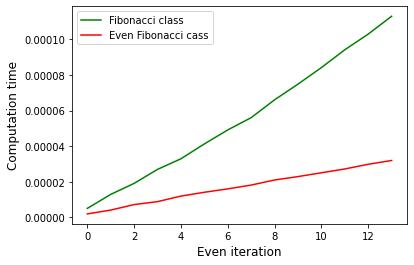

In [40]:
plot_computation_time(with_recursive = False)